### Explore processed pan-cancer data

In [4]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import mpmp.config as cfg
import mpmp.utilities.data_utilities as du

In [5]:
# load mutation info
print('Loading gene label data...', file=sys.stderr)
genes_df = du.load_top_50()
sample_info_df = du.load_sample_info(verbose=True)

# this returns a tuple of dataframes, unpack it below
pancancer_data = du.load_pancancer_data(verbose=True)
(sample_freeze_df,
 mutation_df,
 copy_loss_df,
 copy_gain_df,
 mut_burden_df) = pancancer_data

Loading gene label data...
Loading sample info...
Loading pan-cancer data from cached pickle file...


In [6]:
# load expression data
rnaseq_df = du.load_expression_data(verbose=True)

# standardize columns of expression dataframe
print('Standardizing columns of expression data...', file=sys.stderr)
rnaseq_df[rnaseq_df.columns] = StandardScaler().fit_transform(rnaseq_df[rnaseq_df.columns])

print(rnaseq_df.shape)
rnaseq_df.iloc[:5, :5]

Loading gene expression data...
Standardizing columns of expression data...


(11060, 15369)


,1,100,1000,10000,10001
sample_id,,,,,
TCGA-02-0047-01,-0.144025,-0.206544,1.029891,0.643947,-0.730368
TCGA-02-0055-01,-0.124850,-0.132174,0.689587,0.153994,-0.406662
TCGA-02-2483-01,-0.133468,-0.102772,1.448180,0.668630,0.498391
TCGA-02-2485-01,-0.146976,-0.212598,4.340760,11.504372,0.240748
TCGA-02-2486-01,-0.145246,-0.146875,0.994442,0.116970,0.386085


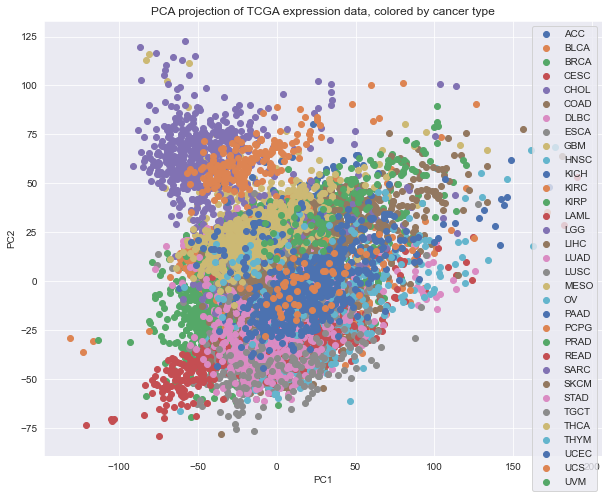

In [13]:
from sklearn.decomposition import PCA

sns.set({'figure.figsize': (10, 8)})

assert sample_info_df.index.equals(rnaseq_df.index)

pca = PCA(n_components=2)
X_proj = pca.fit_transform(rnaseq_df)

enum_samples_df = sample_info_df.reset_index()
rnaseq_cancer_types = sorted(sample_info_df.cancer_type.unique())
# rnaseq_cancer_types = ['LUAD', 'LUSC', 'THCA', 'LGG', 'BRCA']
for i, cancer_type in enumerate(rnaseq_cancer_types):
    ixs = enum_samples_df.index[enum_samples_df['cancer_type'] == cancer_type].tolist()
    plt.scatter(X_proj[ixs, 0], X_proj[ixs, 1], label=cancer_type)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection of TCGA expression data, colored by cancer type')
plt.legend()

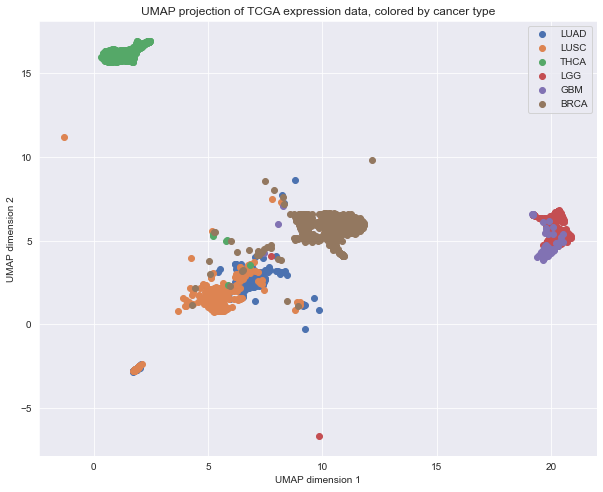

In [16]:
from umap import UMAP

sns.set({'figure.figsize': (10, 8)})

reducer = UMAP()
X_proj = reducer.fit_transform(rnaseq_df)

enum_samples_df = sample_info_df.reset_index()
# rnaseq_cancer_types = sorted(sample_info_df.cancer_type.unique())
rnaseq_cancer_types = ['LUAD', 'LUSC', 'THCA', 'LGG', 'GBM', 'BRCA']
for i, cancer_type in enumerate(rnaseq_cancer_types):
    ixs = enum_samples_df.index[enum_samples_df['cancer_type'] == cancer_type].tolist()
    plt.scatter(X_proj[ixs, 0], X_proj[ixs, 1], label=cancer_type)
    
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.title('UMAP projection of TCGA expression data, colored by cancer type')
plt.legend()